In [1]:
import numpy as np
np.object = object
np.int = int
np.float = float
np.bool = bool

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import model_selection
import glob
import tqdm

In [3]:
def make_pair(path):
    files_list =glob.glob(path+'/*.jpg')
    files_list_1=[]
    files_list_2=[]
    target_list = []
    for path in tqdm.tqdm(files_list):
        files_list_1.append(path)
        files_list_2.append(path)
        target_list.append(1)

        while True:
        
            n=np.random.randint(low=0,high=len(files_list))
            if files_list[n] != path:
                files_list_1.append(path)
                files_list_2.append(files_list[n])
                target_list.append(0)
                break

        data_dict ={
            'image_1':files_list_1,
            'image_2':files_list_2,
            'label':target_list
            
        }
        dataset =pd.DataFrame(data=data_dict)

    return dataset

In [4]:
df1=pd.read_csv(r'C:\Users\abodk222\Desktop\dataset.csv')

In [5]:
df1

,Unnamed: 0,image_1,image_2,label
0,0,D:\archive_2\img_align_celeba\img_align_celeba...,D:\archive_2\img_align_celeba\img_align_celeba...,1
1,1,D:\archive_2\img_align_celeba\img_align_celeba...,D:\archive_2\img_align_celeba\img_align_celeba...,0
2,2,D:\archive_2\img_align_celeba\img_align_celeba...,D:\archive_2\img_align_celeba\img_align_celeba...,1
3,3,D:\archive_2\img_align_celeba\img_align_celeba...,D:\archive_2\img_align_celeba\img_align_celeba...,0
4,4,D:\archive_2\img_align_celeba\img_align_celeba...,D:\archive_2\img_align_celeba\img_align_celeba...,1
...,...,...,...,...
405193,405193,D:\archive_2\img_align_celeba\img_align_celeba...,D:\archive_2\img_align_celeba\img_align_celeba...,0
405194,405194,D:\archive_2\img_align_celeba\img_align_celeba...,D:\archive_2\img_align_celeba\img_align_celeba...,1
405195,405195,D:\archive_2\img_align_celeba\img_align_celeba...,D:\archive_2\img_align_celeba\img_align_celeba...,0
405196,405196,D:\archive_2\img_align_celeba\img_align_celeba...,D:\archive_2\img_align_celeba\img_align_celeba...,1


In [6]:
train,test = model_selection.train_test_split(df1,test_size=0.1,random_state=42,stratify=df1.label)

train.shape,test.shape

((364678, 4), (40520, 4))

In [7]:
def read_image(x,y):
    x1,x2=x
    x1=tf.io.read_file(x1)
    x1=tf.image.decode_jpeg(x1,channels=3)
    x1=tf.image.convert_image_dtype(x1,tf.float32)
    x1=tf.image.resize(x1,(224,224))
    x1=tf.clip_by_value(x1,0.0,0.7)

    x2=tf.io.read_file(x2)
    x2=tf.image.decode_jpeg(x2,channels=3)
    x2=tf.image.convert_image_dtype(x2,tf.float32)
    x2=tf.image.resize(x2,(224,224))
    x2=tf.clip_by_value(x2,0.0,0.7) #0.1
    
    return (x1,x2),y

In [8]:
def train_preprocess(x,y):
    x1,x2=x
    x1=tf.image.random_flip_left_right(x1)
    x1=tf.image.random_flip_up_down(x1)
    x1=tf.image.random_brightness(x1,max_delta=32.0/255.0)
    x1=tf.image.random_saturation(x1,lower=0.5,upper=1.5)
    x1=tf.clip_by_value(x1,0.0,0.7)

    x2=tf.image.random_flip_left_right(x2)
    x2=tf.image.random_flip_up_down(x2)
    x2=tf.image.random_brightness(x2,max_delta=32.0/255.0)
    x2=tf.image.random_saturation(x2,lower=0.5,upper=1.5)
    
    return (x1,x2),y

In [9]:
def dataset_creator(x1,x2, y,training=False):
    data=tf.data.Dataset.from_tensor_slices(((x1,x2),y))

    data=data.shuffle(2000)
    data=data.map(read_image,num_parallel_calls=tf.data.experimental.AUTOTUNE)
    
    if training:
        data=data.map(train_preprocess,num_parallel_calls=tf.data.experimental.AUTOTUNE)
        
    
    data=data.batch(128) #------------------------------------------------------------------------the original is 32
    data = data.prefetch(tf.data.experimental.AUTOTUNE)
    
    return data

In [10]:
train_dataset=dataset_creator(train.image_1,train.image_2,train.label,training=True)
test_dataset=dataset_creator(test.image_1,test.image_2,test.label)

In [11]:
test_dataset

<PrefetchDataset shapes: (((None, 224, 224, 3), (None, 224, 224, 3)), (None,)), types: ((tf.float32, tf.float32), tf.int64)>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

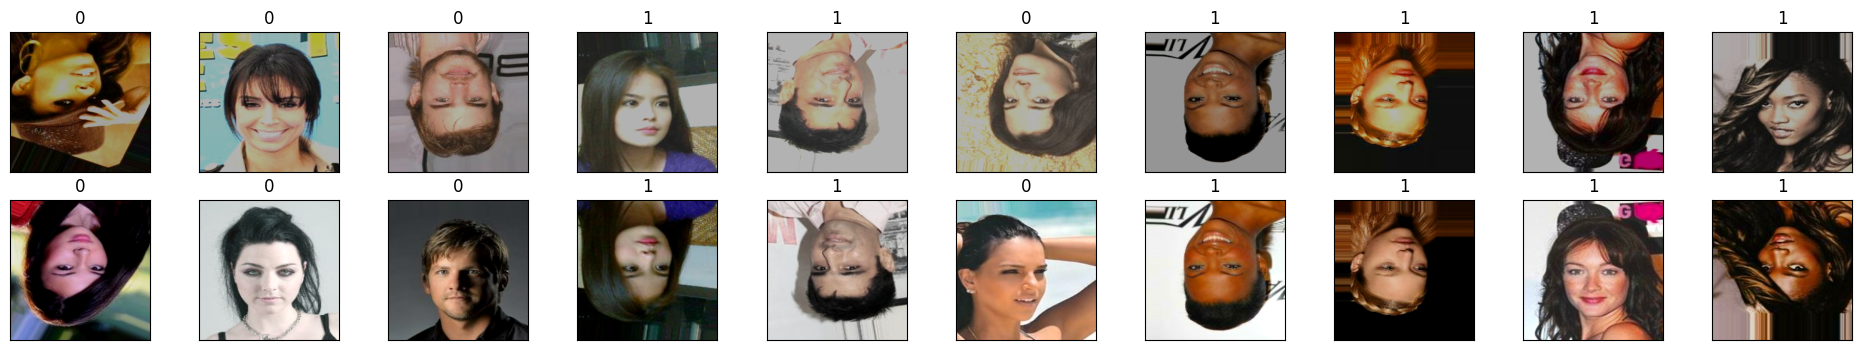

In [12]:
n=10
plt.figure(figsize=(24,4))
for x,y in train_dataset.take(1):
    x1,x2=x


    for i in range(n):
        plt.subplot(2,n,i+1)
        plt.title(f'{y[i]}')
        plt.imshow(tf.squeeze(x1[i]))
        plt.gray()
        plt.xticks([])
        plt.yticks([])
        
        plt.subplot(2,n,n+i+1)
        plt.title(f'{y[i]}')
        plt.imshow(tf.squeeze(x2[i]))
        plt.gray()
        plt.xticks([])
        plt.yticks([])

In [13]:
cnn_model=tf.keras.applications.densenet.DenseNet121(
#tf.keras.applications.vgg16.VGG16(
#tf.keras.applications.resnet50.ResNet50(
    include_top=False,
    input_shape=(224,224,3), #old (244,244)
)
cnn_model.trainable=False
cnn_model.summary()

Model: "densenet121"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1/conv[0][0]                 
________________________________________________________________________________________

In [14]:
input1 = tf.keras.Input(shape=(224,224,3)) #old (244,244)
input2 = tf.keras.Input(shape=(224,224,3)) #old (244,244)
x1 = cnn_model(input1)
x2 = cnn_model(input2)

x1 = tf.keras.layers.GlobalAveragePooling2D()(x1)
x2 = tf.keras.layers.GlobalAveragePooling2D()(x2)

x = tf.keras.layers.concatenate([x1,x2])
x = tf.keras.layers.Dense(512,use_bias=False)(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.LeakyReLU()(x)
x = tf.keras.layers.Dense(128,use_bias=False)(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.LeakyReLU()(x)
outp = tf.keras.layers.Dense(units=1,activation=tf.nn.sigmoid)(x)

model= tf.keras.Model(inputs=[input1,input2],outputs=[outp])
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
densenet121 (Functional)        (None, 7, 7, 1024)   7037504     input_2[0][0]                    
                                                                 input_3[0][0]                    
__________________________________________________________________________________________________
global_average_pooling2d (Globa (None, 1024)         0           densenet121[0][0]            

# -------------------------------------------------------------------------------------

# -------------------------------------------------------------------------------------

# -------------------------------------------------------------------------------------

# -------------------------------------------------------------------------------------

In [15]:
model.compile('adam',loss='binary_crossentropy',metrics=['acc'])

In [16]:
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger

checkpoint_callback = ModelCheckpoint(
    filepath=r'C:\Users\abodk222\Desktop\densenet_model_2.h5',   # Path to save the model file
    monitor='val_loss',         # Metric to monitor for improvement
    save_best_only=True,        # Save only the best models
    save_weights_only=False,    # Save the entire model, not just the weights
    mode='min',                 # 'min' means save when the monitored metric decreases (e.g., validation loss)
    verbose=1                    # Display messages about the saving process
)
training_history = CSVLogger(filename=r"C:\Users\abodk222\Desktop\training_history_2.csv")

model.fit(train_dataset,epochs=10,validation_data=test_dataset,callbacks=[checkpoint_callback,training_history])

Epoch 1/10
2850/2850 [==============================] - 2730s 945ms/step - loss: 0.0944 - acc: 0.9637 - val_loss: 0.0221 - val_acc: 0.9950

Epoch 00001: val_loss improved from inf to 0.02205, saving model to C:\Users\abodk222\Desktop\densenet_model_2.h5
Epoch 2/10
2850/2850 [==============================] - 2057s 722ms/step - loss: 0.0391 - acc: 0.9864 - val_loss: 0.0174 - val_acc: 0.9936

Epoch 00002: val_loss improved from 0.02205 to 0.01736, saving model to C:\Users\abodk222\Desktop\densenet_model_2.h5
Epoch 3/10
  13/2850 [..............................] - ETA: 30:46 - loss: 0.1116 - acc: 0.9621

KeyboardInterrupt: 

In [17]:
model.save(r'C:\Users\abodk222\Desktop\densenet_model_manaual_save_2.h5')

In [18]:
train_history =pd.DataFrame(model.history.history)
train_history

,loss,acc,val_loss,val_acc
0,0.094376,0.963710,0.022051,0.995015
1,0.039056,0.986418,0.017361,0.993633


<Axes: >

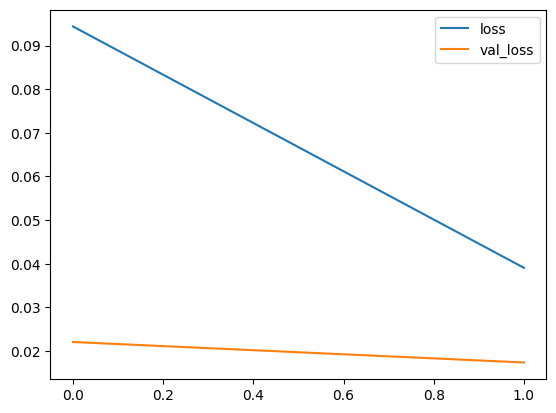

In [19]:
train_history[['loss','val_loss']].plot.line()

<Axes: >

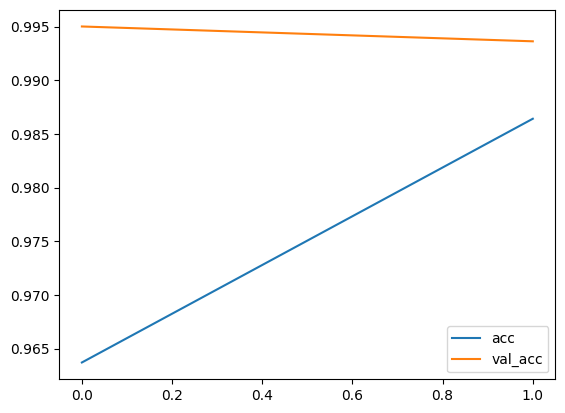

In [24]:
train_history[['acc','val_acc']].plot.line()

In [27]:
tf.saved_model.save(model,r'C:\Users\abodk222\Desktop')

INFO:tensorflow:Assets written to: C:\Users\abodk222\Desktop\assets


In [29]:
converter = tf.lite.TFLiteConverter.from_saved_model(r'C:\Users\abodk222\Desktop\saved')
tflite_model = converter.convert()

# Save the TFLite model to a file
with open(r'C:\Users\abodk222\Desktop\model.tflite', "wb") as f:
    f.write(tflite_model)

In [30]:
df2=df1.copy()

In [31]:
df2.to_csv(r'C:\Users\abodk222\Desktop\dataset2', index=False)